In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [2]:
des = pd.read_csv('../input/home-credit-default-risk/HomeCredit_columns_description.csv', encoding='Latin-1')
des[des['Table'] == 'bureau.csv']

,Unnamed: 0,Table,Row,Description,Special
122,125,bureau.csv,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau",hashed
123,126,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed
124,127,bureau.csv,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
125,128,bureau.csv,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
126,129,bureau.csv,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application
127,130,bureau.csv,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,NaN
128,131,bureau.csv,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application
129,132,bureau.csv,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application
130,133,bureau.csv,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),NaN
131,134,bureau.csv,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,NaN


# 1. EDA BUREAU DATA

In [3]:
bureau = pd.read_csv('../input/home-credit-default-risk/bureau.csv')

In [4]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
print(f"There are {bureau.shape[0]} data points in Bureau table.")
print(f"There are {bureau.shape[1]} features in Bureau table.")

There are 1716428 data points in Bureau table.
There are 17 features in Bureau table.


In [6]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [7]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [8]:
bureau.duplicated().sum()

0

In [9]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [10]:
bureau.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [11]:
(bureau.isna().sum() / bureau.shape[0] * 100).sort_values()

SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_UPDATE         0.000000
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
AMT_CREDIT_SUM             0.000757
DAYS_CREDIT_ENDDATE        6.149573
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
AMT_ANNUITY               71.473490
dtype: float64

<AxesSubplot:>

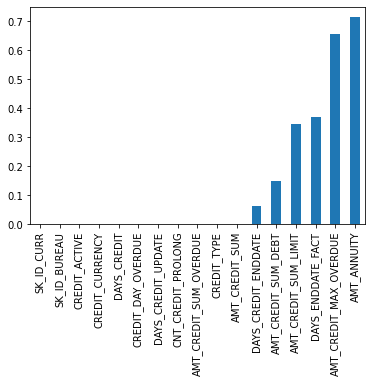

In [12]:
(bureau.isna().sum() / bureau.shape[0]).sort_values().plot(kind = 'bar')

In [13]:
# drop columns with more than 60% null values
bureau = bureau.drop(['AMT_ANNUITY', 'AMT_CREDIT_MAX_OVERDUE'], axis = 1)

In [14]:
bureau['CREDIT_DAY_OVERDUE'].value_counts()

0       1712211
30          311
60          126
8           103
13          103
         ...   
1445          1
278           1
707           1
2193          1
1931          1
Name: CREDIT_DAY_OVERDUE, Length: 942, dtype: int64

In [15]:
bureau['CNT_CREDIT_PROLONG'].value_counts()

0    1707314
1       7620
2       1222
3        191
4         54
5         21
9          2
6          2
8          1
7          1
Name: CNT_CREDIT_PROLONG, dtype: int64

In [16]:
bureau['AMT_CREDIT_SUM_OVERDUE'].value_counts()

0.000       1712270
4.500           301
9.000           107
13.500           81
18.000           72
             ...   
323.010           1
88.695            1
142.830           1
5069.070          1
352.620           1
Name: AMT_CREDIT_SUM_OVERDUE, Length: 1616, dtype: int64

In [17]:
# drop columns with more than 99% value is 0
bureau = bureau.drop(['CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM_OVERDUE'], axis = 1)

In [18]:
categorical_list_b = []
numerical_list_b = []
for i in bureau.columns.tolist():
    if bureau[i].dtype == 'object':
        categorical_list_b.append(i)
        #print(i)
    else:
        numerical_list_b.append(i)
        
print('Number of categorical features:', str(len(categorical_list_b)))
print('Number of numerical features:', str(len(numerical_list_b)))

Number of categorical features: 3
Number of numerical features: 9


In [19]:
bureau['CREDIT_ACTIVE'].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [20]:
bureau['CREDIT_CURRENCY'].value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

In [21]:
bureau['CREDIT_TYPE'].value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64

In [22]:
bureau.shape

(1716428, 12)

In [23]:
bureau.nunique()

SK_ID_CURR               305811
SK_ID_BUREAU            1716428
CREDIT_ACTIVE                 4
CREDIT_CURRENCY               4
DAYS_CREDIT                2923
DAYS_CREDIT_ENDDATE       14096
DAYS_ENDDATE_FACT          2917
AMT_CREDIT_SUM           236708
AMT_CREDIT_SUM_DEBT      226537
AMT_CREDIT_SUM_LIMIT      51726
CREDIT_TYPE                  15
DAYS_CREDIT_UPDATE         2982
dtype: int64

# 1.1. univariate analysis CREDIT_ACTIVE

In [24]:
from collections import Counter
credit_active_counter = Counter()
for word in bureau['CREDIT_ACTIVE'].values:
    credit_active_counter.update(word.split(','))

print(credit_active_counter)

Counter({'Closed': 1079273, 'Active': 630607, 'Sold': 6527, 'Bad debt': 21})


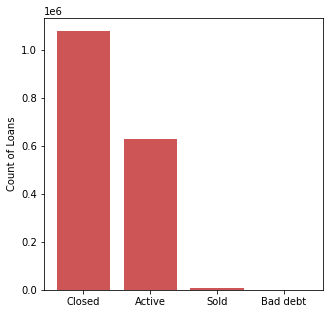

In [25]:
# distribution of credit active
status_dict = dict(credit_active_counter)
sorted_status_dict = dict(sorted(status_dict.items(), key = lambda kv: kv[1], reverse = True))

ind = np.arange(len(sorted_status_dict))
plt.figure(figsize = (5, 5))
p1 = plt.bar(ind, list(sorted_status_dict.values()), color = '#CD5555') 

plt.ylabel('Count of Loans')
plt.xticks(ind, list(sorted_status_dict.keys()))
plt.show()

- Most of the applications in the Bureau Data are closed, which is followed by the status being Active.
- There are very few loans that are 'Sold' or considered to be 'Bad Debt'.

# 1.2. univariate analysis DAY_CREDIT

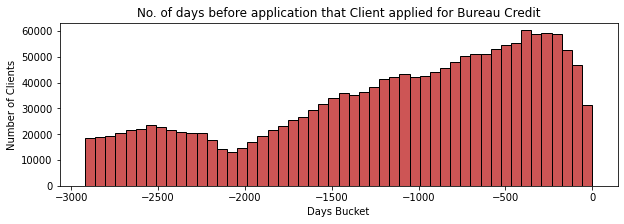

In [26]:
plt.figure(figsize = (10, 3))
plt.hist(bureau['DAYS_CREDIT'].values, bins = 50, edgecolor = 'black', color = '#CD5555')
plt.title('No. of days before application that Client applied for Bureau Credit')
plt.xlabel('Days Bucket')
plt.ylabel('Number of Clients')
plt.show()

- Most of the clients applied for Bureau Credit less than 500 days before the date of loan application.

# 1.3. univariate analysis CREDIT_TYPE

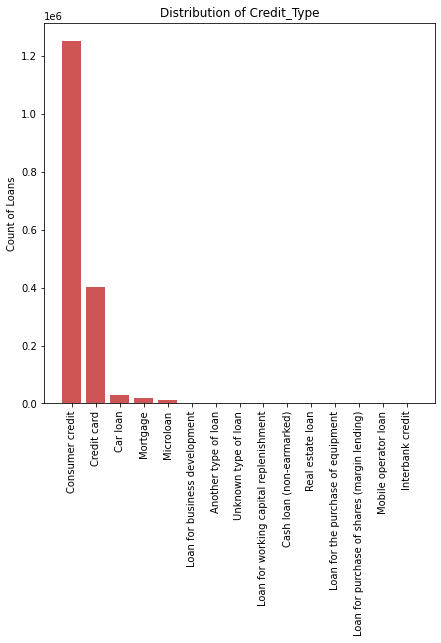

In [27]:
credit_type_counter = Counter()
for type in bureau['CREDIT_TYPE'].values:
    credit_type_counter.update(type.split(','))
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
type_dict = dict(credit_type_counter)
sorted_type_dict = dict(sorted(type_dict.items(), key=lambda kv: kv[1], reverse=True))

ind_2 = np.arange(len(sorted_type_dict))
plt.figure(figsize=(7,7))
p1 = plt.bar(ind_2, list(sorted_type_dict.values()),color = '#CD5555')

plt.ylabel('Count of Loans')
plt.title('Distribution of Credit_Type')
plt.xticks(ind_2, list(sorted_type_dict.keys()),rotation=90)
plt.show()

- Consumer Credit and Credit Cards are the mostly registered credit types in the Credit Bureau.

# 2. EDA BUREAU_BALANCE DATA

In [28]:
bureau_balance = pd.read_csv('../input/home-credit-default-risk/bureau_balance.csv')

In [29]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [30]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
bureau_balance.duplicated().sum()

In [ ]:
bureau_balance.describe()

In [ ]:
bureau_balance.dtypes

In [ ]:
bureau_balance.nunique()

In [ ]:
print('Number of data points : ', bureau_balance.shape[0])
print('Number of features : ', bureau_balance.shape[1])

In [ ]:
(bureau_balance.isnull().sum() / bureau_balance.shape[0]) * 100

In [ ]:
bureau_balance.columns

In [ ]:
categorical_list_bb = []
numerical_list_bb = []
for i in bureau_balance.columns.tolist():
    if bureau_balance[i].dtype == 'object':
        categorical_list_bb.append(i)
        #print(i)
    else:
        numerical_list_bb.append(i)
        
print('Number of categorical features:', str(len(categorical_list_bb)))
print('Number of numerical features:', str(len(numerical_list_bb)))

# 2.1. Univariate analysis: STATUS

In [ ]:
bureau_status_counter = Counter()
for status in bureau_balance['STATUS'].values:
    bureau_status_counter.update(status.split(','))
    
# dict sort 
status_dict = dict(bureau_status_counter)
sorted_status_dict = dict(sorted(status_dict.items(), key = lambda kv: kv[1], reverse = True))


ind_3 = np.arange(len(sorted_status_dict))
plt.figure(figsize = (7, 7))
p1 = plt.bar(ind_3, list(sorted_status_dict.values()),color = '#CD5555')

plt.ylabel('Count of Loans')
plt.title('Distribution of Status in the Bureau')
plt.xticks(ind_3, list(sorted_status_dict.keys()), rotation = 90)
plt.show()

- We can conclude that there are very few annuity defaulters in the data.